# Setup the dataframe

In [1]:
import pandas as pd
import os
from datetime import datetime, timezone
import time
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties

all_data = pd.DataFrame()

# Be careful with this. If there is more than one CSV file only the last one will be used. 
for file in os.listdir('./'):
    if file.endswith('csv'):
        all_data = pd.read_csv('./' + file, sep=';')
        print("Using file: " + file)


c:\users\ben mcguffog\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (20,54,636,637,638,639,640,649,650) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Using file: 2021_01_10_16_48_27.csv


## Setup the Date_Time_(GMT) column

In [2]:
start = time.time()

all_data['PLC_TIME(Timedate48)'] = all_data['PLC_TIME(Timedate48)'].astype(str)

def getUnixTime(date):
    return date.split(',')[0]

def convertToUTC(date):
    return datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

def convertToGMT(unix_timestamp):
    utcTime = datetime.fromtimestamp(unix_timestamp, timezone.utc)
    localTime = utcTime.astimezone()
    return localTime.strftime("%Y-%m-%d %H:%M:%S")
    
all_data['Date_Time_(GMT)'] = all_data['PLC_TIME(Timedate48)'].apply(lambda x: getUnixTime(x))
all_data['Date_Time_(GMT)'] = all_data['Date_Time_(GMT)'].astype('int32')
all_data['Date_Time_(GMT)'] = all_data['Date_Time_(GMT)'].apply(lambda x: convertToGMT(x))
column_name = 'Date_Time_(GMT)'
first_column = all_data.pop(column_name)
all_data.insert(0, column_name, first_column)
all_data['Date_Time_(GMT)'] = pd.to_datetime(all_data['Date_Time_(GMT)'])
all_data = all_data.sort_values(by='Date_Time_(GMT)')

duration = time.time() - start
print("Total time: %10.2f" % duration)

all_data.tail()

Total time:       1.73


,Date_Time_(GMT),TIME,PLC_TIME_OFFSET(Integer8),PLC_TIME_CV(Enum2),PLC_TIME(Timedate48),EVR_VehicleNumber(Unsigned16),EVR_TIME_CV(Enum2),EVR_TIME(Timedate48),EVR_Speed(Unsigned16),EVR_Speed_CV(Enum2),...,EKE_DIOs_Car15(Bitset32),EKE_DIOs_Car16(Bitset32),EKE_DIOs_Car2(Bitset32),EKE_DIOs_Car3(Bitset32),EKE_DIOs_Car4(Bitset32),EKE_DIOs_Car5(Bitset32),EKE_DIOs_Car6(Bitset32),EKE_DIOs_Car7(Bitset32),EKE_DIOs_Car8(Bitset32),EKE_DIOs_Car9(Bitset32)
132016,2021-01-11 11:34:53,"67592,192",0,1,"1610364893,000",15006,1,"1610364894,000",0,1,...,0,0,3f1c083,3f1c083,3f1c083,3f1c083,3f1c083,3f1c083,3f1c083,3f1c083
132017,2021-01-11 11:34:54,"67592,704",0,1,"1610364894,000",15006,1,"1610364894,000",0,1,...,0,0,3f1c083,3f1c083,3f1c083,3f1c083,3f1c083,3f1c083,3f1c083,3f1c083
132018,2021-01-11 11:34:54,"67593,216",0,1,"1610364894,000",15006,1,"1610364895,000",0,1,...,0,0,3f1c083,3f1c083,3f1c083,3f1c083,3f1c083,3f1c083,3f1c083,3f1c083
132019,2021-01-11 11:34:55,"67593,728",0,1,"1610364895,000",15006,1,"1610364895,000",0,1,...,0,0,3f1c083,3f1c083,3f1c083,3f1c083,3f1c083,3f1c083,3f1c083,3f1c083
132020,2021-01-11 11:34:56,"67594,240",0,1,"1610364896,000",15006,1,"1610364896,000",0,1,...,0,0,3f1c083,3f1c083,3f1c083,3f1c083,3f1c083,3f1c083,3f1c083,3f1c083


#### Cleanup the NaN entries

In [3]:
print("Rows before: " + str(all_data.shape[0]))
all_data = all_data.dropna(how='all')
print("Rows after: " + str(all_data.shape[0]))
all_data.head()

Rows before: 132021
Rows after: 132021


,Date_Time_(GMT),TIME,PLC_TIME_OFFSET(Integer8),PLC_TIME_CV(Enum2),PLC_TIME(Timedate48),EVR_VehicleNumber(Unsigned16),EVR_TIME_CV(Enum2),EVR_TIME(Timedate48),EVR_Speed(Unsigned16),EVR_Speed_CV(Enum2),...,EKE_DIOs_Car15(Bitset32),EKE_DIOs_Car16(Bitset32),EKE_DIOs_Car2(Bitset32),EKE_DIOs_Car3(Bitset32),EKE_DIOs_Car4(Bitset32),EKE_DIOs_Car5(Bitset32),EKE_DIOs_Car6(Bitset32),EKE_DIOs_Car7(Bitset32),EKE_DIOs_Car8(Bitset32),EKE_DIOs_Car9(Bitset32)
0,1970-01-01,"0,000",0,0,"0,000",15006,1,"1610297308,000",0,1,...,0,0,31c083,31c083,31c083,31c083,31c083,431c083,0,0
126,1970-01-01,"64,512",0,0,"0,000",15006,1,"1610297372,000",0,1,...,0,0,31c083,31c083,31c083,31c083,31c083,431c083,0,0
128,1970-01-01,"65,536",0,0,"0,000",15006,1,"1610297373,000",0,1,...,0,0,31c083,31c083,31c083,31c083,31c083,431c083,0,0
129,1970-01-01,"66,048",0,0,"0,000",15006,1,"1610297374,000",0,1,...,0,0,31c083,31c083,31c083,31c083,31c083,431c083,0,0
130,1970-01-01,"66,560",0,0,"0,000",15006,1,"1610297374,000",0,1,...,0,0,31c083,31c083,31c083,31c083,31c083,431c083,0,0


### Remove string columns

In [4]:
import numpy as np
HABD_cols = [col for col in all_data if not 'Date_Time_(GMT)' in col]
before = all_data.shape[1]

for col in HABD_cols:
    if all_data.dtypes[col] == np.object:
        del all_data[col]

print("Columns removed: " + str(before - all_data.shape[1]))
print("Columns in all_data: " + str(all_data.shape[1]))

Columns removed: 19
Columns in all_data: 633


### Remove 0 data columns

In [5]:
before = all_data.shape[1]
all_data = all_data.loc[:, (all_data != 0).any(axis=0)]
print("Columns removed: " + str(before - all_data.shape[1]))
print("Columns in all_data: " + str(all_data.shape[1]))

Columns removed: 280
Columns in all_data: 353


### Setup HABD_columns for removal

In [6]:
HABD_columns = []
HABD_columns.append('EVR_VehicleNumber(Unsigned16)')   # Remove
HABD_columns.append('EVR_TIME_CV(Enum2)')
HABD_columns.append('EVR_Speed_CV(Enum2)')
HABD_columns.append('EVR_Distance(Unsigned32)')
HABD_columns.append('HABD_HighTemp(Unsigned16)')

print("Columns in list: " + str(len(HABD_columns)))
print("Columns in all_data: " + str(all_data.shape[1]))
print("Rows in all_data: " + str(all_data.shape[0]))

Columns in list: 5
Columns in all_data: 353
Rows in all_data: 132021


##### Remove HABD_columns

In [7]:
before = all_data.shape[1]
#all_data.drop(HABD_columns, axis=1)
for column in HABD_columns:
    del all_data[column]
# HABD_columns.pop(0) # removes useless column 115, 115 ...
print("Columns removed: " + str(before - all_data.shape[1]))
print("Columns in all_data: " + str(all_data.shape[1]))
print("Rows in all_data: " + str(all_data.shape[0]))

Columns removed: 5
Columns in all_data: 348
Rows in all_data: 132021


### Remove 1970 rows

In [8]:
before = all_data.shape[0]
all_data = all_data[(all_data['Date_Time_(GMT)'].dt.year >= 2010)]
print("Rows removed: " + str(before - all_data.shape[0]))

Rows removed: 197


#### Setup the useable columns

In [9]:
HABD_cols = [col for col in all_data if 'Car1(' in col]

### Replace 0 data with NaN

In [11]:
# all_data = all_data[HABD_cols].fillna(0)

##### Check the coach numbers

In [10]:
for col in HABD_cols[1:]:
    print(all_data[col].value_counts())

17    29023
16    27413
21    20526
20     9682
15     9126
14     8952
18     8874
19     7226
13     7200
12     3018
22      728
0        56
Name: HABD_TempCh9_Car1(Integer16), dtype: int64
20    32960
19    19041
21    15526
17    14028
18    11047
12    10170
16     9060
15     7066
14     6106
13     3938
22     2826
0        56
Name: HABD_TempCh8_Car1(Integer16), dtype: int64
20    32730
19    22877
18    17346
17    17164
16    13755
12     9106
15     8406
14     4100
13     3530
11     2754
0        56
Name: HABD_TempCh7_Car1(Integer16), dtype: int64
19    52889
18    20106
17    16804
16    10667
15     8704
12     7592
20     6006
13     5948
14     3052
0        56
Name: HABD_TempCh6_Car1(Integer16), dtype: int64
19    46183
18    17892
17    16779
20    12370
16    10602
15     7338
12     7334
13     7164
14     6106
0        56
Name: HABD_TempCh5_Car1(Integer16), dtype: int64
18    25604
17    18495
22    15400
23    11914
16    11796
12     9090
15     8248
21     8146

In [9]:
coach_numbers = [col for col in all_data if not 'NUMBER' in col]

for col in coach_numbers[1:]:
    print(all_data[col].value_counts())

1    131824
Name: PLC_TIME_CV(Enum2), dtype: int64
0       76027
8065     1984
8070     1852
8059     1670
8076     1060
        ...  
688         4
3948        2
8817        2
1720        2
2706        2
Name: EVR_Speed(Unsigned16), Length: 1512, dtype: int64
0     112608
20     10984
80      8232
Name: HABD_TempAlarmHigh_Car14(Bitset8), dtype: int64
0    131804
1        20
Name: HABD_TempDiff(Boolean1), dtype: int64
16    37541
17    12358
18    10347
22     9916
23     9046
24     8458
15     8214
20     8084
19     7908
13     5896
21     5834
12     3832
14     3542
25      792
0        56
Name: HABD_TempCh10_Car1(Integer16), dtype: int64
0     55773
22    16934
21    14456
20     6933
14     6916
15     4588
13     4434
16     4136
17     3992
19     3494
23     3400
18     2864
12     2038
24     1866
Name: HABD_TempCh16_Car14(Integer16), dtype: int64
0     55773
24    15110
23    12832
22    11420
13     5950
20     4538
21     4451
12     4144
15     3888
14     3622
17     35

### Check the temperature counts

# Graph a coach's temperature spikes

### Isolate the columns

In [10]:
HABD_cols.insert(0, 'Date_Time_(GMT)')
HABD_cols.remove('EKE_FailB_Car1(Bitset16)') # Remove the last entry EKE FailB, BE CAREFUL!!
test_data = all_data[HABD_cols]

In [32]:
test_data.head()

,Date_Time_(GMT),Date_Time_(GMT),HABD_TempCh10_Car1(Integer16),HABD_TempCh9_Car1(Integer16),HABD_TempCh8_Car1(Integer16),HABD_TempCh7_Car1(Integer16),HABD_TempCh6_Car1(Integer16),HABD_TempCh5_Car1(Integer16),HABD_TempCh4_Car1(Integer16),HABD_TempCh3_Car1(Integer16),HABD_TempCh2_Car1(Integer16),HABD_TempCh1_Car1(Integer16),HABD_TempCh16_Car1(Integer16),HABD_TempCh15_Car1(Integer16),HABD_TempCh14_Car1(Integer16),HABD_TempCh13_Car1(Integer16),HABD_TempCh12_Car1(Integer16),HABD_TempCh11_Car1(Integer16)
197,2021-01-10 16:50:08,2021-01-10 16:50:08,16,16,19,19,19,19,17,18,16,16,19,19,19,19,17,18
198,2021-01-10 16:50:09,2021-01-10 16:50:09,16,16,19,19,19,19,17,18,16,16,19,19,19,19,17,18
199,2021-01-10 16:50:09,2021-01-10 16:50:09,16,16,19,19,19,19,17,18,16,16,19,19,19,19,17,18
201,2021-01-10 16:50:10,2021-01-10 16:50:10,16,16,19,19,19,19,17,18,16,16,19,19,19,19,17,18
200,2021-01-10 16:50:10,2021-01-10 16:50:10,16,16,19,19,19,19,17,18,16,16,19,19,19,19,17,18


## Plot 16 Channels on one plot

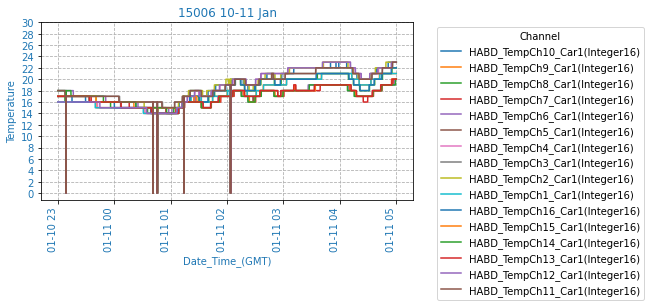

In [11]:
# new_column = 'HABD_TempCh2_Car2(Integer16)'
start_date = '2021-01-10 23:00:00'
end_date = '2021-01-11 05:00:00'
temperature = range(0, 32, 2)

df = test_data[(test_data['Date_Time_(GMT)'] > start_date) & (test_data['Date_Time_(GMT)'] <= end_date)].copy().set_index('Date_Time_(GMT)')
todaysPlot = df.plot(kind='line', legend=None)
plt.xticks(color='C0', rotation='vertical')
plt.xlabel('Date_Time_(GMT)', color='C0', size=10)
plt.yticks(temperature, color='C0')
plt.tight_layout(pad=2)
plt.title('15006 10-11 Jan', color='C0')
plt.ylabel('Temperature', color='C0', size=10)
plt.grid('on', linestyle='--')
lgd = plt.legend(title='Channel', bbox_to_anchor=(1.05, 1), loc='upper left')

#plt.margins(x=0, y=0)   # Values in (-0.5, 0.0) zooms in to center

plt.savefig('myfig100.png', dpi=300, facecolor='w', edgecolor='w',
        orientation='landscape', format=None, bbox_extra_artists=(lgd,), bbox_inches='tight',
        transparent=False, pad_inches=0.1)
plt.show()

## Plot 16 Channels on separate grids

### Filter out the low temperatures

In [11]:
HABD_cols = [col for col in all_data]